In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [9]:
df =  pd.read_csv('boston_housing.csv')
df.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
X = df[['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
X_norm = preprocessing.normalize(X, axis = 0)
y = df['medv']

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_norm, y, test_size=0.3, random_state=31)

In [12]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_val_pred = lreg.predict(X_val)

In [13]:
mse = mean_squared_error(y_val, y_val_pred)

print("Multi-linear regression validatioon MSE is", mse)

Multi-linear regression validatioon MSE is 21.58114612403253


In [14]:
lreg_coef = dict(zip(X.columns, np.transpose(lreg.coef_)))
lreg_x = list(lreg_coef.keys())
lreg_y = list(lreg_coef.values())

In [15]:
lasso_reg = Lasso(alpha=0.008)
lasso_reg.fit(X_train, y_train)
y_val_pred = lasso_reg.predict(X_val)

In [16]:
mse_lasso = mean_squared_error(y_val, y_val_pred)

print("Lasso validation MSE is", mse_lasso)

Lasso validation MSE is 26.059895644427694


In [17]:
lasso_coef=  dict(zip(X.columns, np.transpose(lasso_reg.coef_)))

lasso_x = list(lasso_coef.keys())
lasso_y = list(lasso_coef.values())

In [18]:
ridgeReg = Ridge(alpha=0.008)
ridgeReg.fit(X_train, y_train)
y_val_pred = ridgeReg.predict(X_val)

In [19]:
mse_ridge = mean_squared_error(y_val, y_val_pred)

print("Ridge validation MSE is", mse_ridge)

Ridge validation MSE is 23.016227017838553


In [22]:
ridge_coef = dict(zip(X.columns, np.transpose(lasso_reg.coef_)))
ridge_x = list(lasso_coef.keys())
ridge_y = list(lasso_coef.values())

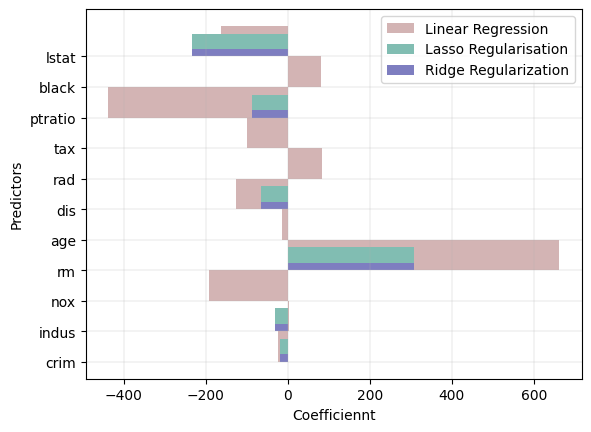

In [25]:
plt.rcdefaults()

plt.barh(lreg_x, lreg_y, 1.0, align='edge', color="#D3B4B4" ,label="Linear Regression")
plt.barh(lasso_x, lasso_y, 0.75 , align = 'edge', color="#81BDB2", label="Lasso Regularisation")
plt.barh(ridge_x, ridge_y, 0.25, align='edge', color="#7E7EC0", label="Ridge Regularization")
plt.grid(linewidth=0.2)
plt.xlabel('Coefficiennt')
plt.ylabel('Predictors')
plt.legend(loc='best')
plt.show()